# 1. Set Up

In [34]:
import pandas as pd
import numpy as np

In [36]:
import matplotlib.pyplot as plt            # library for visualization

In [35]:
import random                              # pseudo-random number generator

In [1]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK

# 2.The Data

In [2]:
# downloads sample twitter dataset.
#nltk.download('twitter_samples')

In [3]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

## 2.1 Insights

In [4]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


In [5]:
print("Example : ", all_negative_tweets[0])

Example :  hopeless for tmr :(


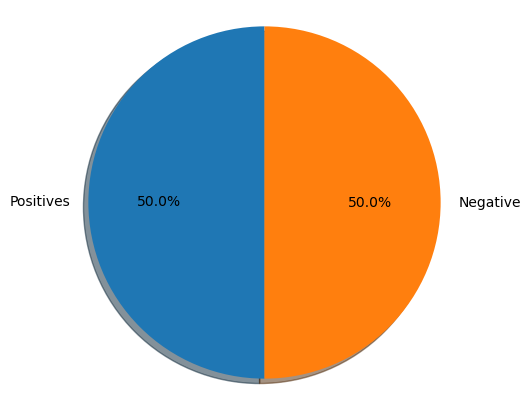

In [6]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

In [7]:
# Look at Raw Texts
# Positive in Gree, negative in Red

print('\033[92m]' + all_positive_tweets[0])

print('\033[91m]' + all_negative_tweets[0])

]#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
]hopeless for tmr :(


# 3. Processing The Data

In [8]:
# Download Stopwords
#nltk.download('stopwords')

In [9]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [10]:
tweet =  "My beautiful sunflowers on a sunny Friday morning off :) \
#sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i"

In [11]:
tweet

'My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i'

## 3.1 Basic Cleaning

In [19]:
print('\033[92m' + tweet)
print('\033[94m')
# Remove Old Style Retweet text "RT, Retweet"
temp_tweet = re.sub(r'^RT[\s]+', '', tweet)
print(temp_tweet)

#Remove Hyperlinks
temp_tweet = re.sub(r'https?://[^\s\n\r]+', '', temp_tweet)
print("\n", temp_tweet)

#Remove hashtags
final_tweet  = re.sub(r'#','',temp_tweet)
print('\n',final_tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

 My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… 

 My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


## 3.2 Tokenizing

In [20]:
print('\033[92m' + final_tweet)
print('\033[94m')

#Instantiate tokenizer
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len = True)

#tokenize tweets
tweet_tokens = tokenizer.tokenize(final_tweet)
print('\n', tweet_tokens)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


 ['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


# 3.3 Removing Stopwards & Punctuations

In [21]:
stopwords_eng = stopwords.words('english')

print("StopWords:")
print(stopwords_eng[:5])
print("Total Stopwords : ", len(stopwords_eng))

print("\nPunctuations:")
print(string.punctuation[:5])
print("Total Punctuations : ", len(string.punctuation))

StopWords:
['i', 'me', 'my', 'myself', 'we']
Total Stopwords :  179

Punctuations:
!"#$%
Total Punctuations :  32


## 3.4 Clean Tokenized Tweets

In [22]:
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweet_clean = list()
for word in tweet_tokens:
    if (word not in stopwords_eng) and (word not in string.punctuation):
        tweet_clean.append(word)
        
print(" Clean tokenized Tweets :")
print(tweet_clean)


['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

 Clean tokenized Tweets :
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


# 3.5 Stemming

In [23]:
print('\033[92m')
print(tweet_clean)
print('\033[94m')

#Initiate Stemmer
stemmer = PorterStemmer()

#List to store the stems
tweet_stem = []

for word in tweet_clean:
    stem_word = stemmer.stem(word)
    tweet_stem.append(stem_word)
    
print("Stemmed Words :")
print(tweet_stem)


['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

Stemmed Words :
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


# 4. Check The process_tweet() function 

In [25]:
def process_tweet(raw_tweet):
    #Remove Raw Tweets
    temp_tweet = re.sub(r'^RT[\s]+', '', raw_tweet)
    #Remove Hyperlinks
    temp_tweet = re.sub(r'https?://[^\s\n\r]+', '', temp_tweet)
    #Remove hashtags
    temp_tweet  = re.sub(r'#','',temp_tweet)

    #tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len = True)
    temp_tweet = tokenizer.tokenize(temp_tweet)
    
    #Getting the stopwords
    stopwords_eng = stopwords.words('english')
    
    #Clean stopwards & Punctuations
    tweet_clean = list()
    for word in temp_tweet:
        if (word not in stopwords_eng) and (word not in string.punctuation):
            tweet_clean.append(word)
            
    #Stemming
    #Initiate Stemmer
    stemmer = PorterStemmer()

    #List to store the stems
    tweet_stem = []

    for word in tweet_clean:
        stem_word = stemmer.stem(word)
        tweet_stem.append(stem_word)
    
    return tweet_stem

In [30]:
print('\033[92m' + tweet)
tweet_stem = process_tweet(tweet)
print('\033[94m')
print(tweet_stem)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


# 5. Class Frequency

In [59]:
def class_frequency(tweets, ys):
    """
    Input:
        tweets: list, list of tweets
        ys: list, respective class of the tweets
    """
    #To iterate over zip
    if type(ys) == list:
        yslist = ys
    else:
        yslist = np.squeeze(ys).tolist()
    
    freqs = {}
    for tweet, ys in zip(tweets, ys):
        for word in process_tweet(tweet):
            pair = (word, ys)
            freqs[pair] = freqs.get(pair, 0) + 1
            
    return freqs
    
    

In [60]:
class_frequency([tweet],[0])

{('beauti', 0): 1,
 ('sunflow', 0): 2,
 ('sunni', 0): 1,
 ('friday', 0): 2,
 ('morn', 0): 1,
 (':)', 0): 1,
 ('favourit', 0): 1,
 ('happi', 0): 1,
 ('…', 0): 1}